In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 



/Users/shrutisekhar/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Question 1: CNN using Tensorflow

1. Load the cifar 100 dataset. Use the 'coarse' labels.
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar100/load_data



In [56]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')

2. Check if there are 20 labels in y_train using np.unique().

In [57]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [58]:
print(np.shape(x_train),np.shape(y_train))

(50000, 32, 32, 3) (50000, 1)


In [61]:
x_train,x_test=x_train/255.0,x_test/255.0

3. More information about the dataset could be found here : https://www.cs.toronto.edu/~kriz/cifar.html . Plot the first 25 images from both the train and test data.

class_names = ["aquatic mammals","fish","flowers","food containers","fruit and vegetables","household electrical devices",
"household furniture","insects","large carnivores","large man-made outdoor things","large natural outdoor scenes","large omnivores and herbivores","medium-sized mammals","non-insect invertebrates","people","reptiles","small mammals","trees","vehicles 1","vehicles 2"]

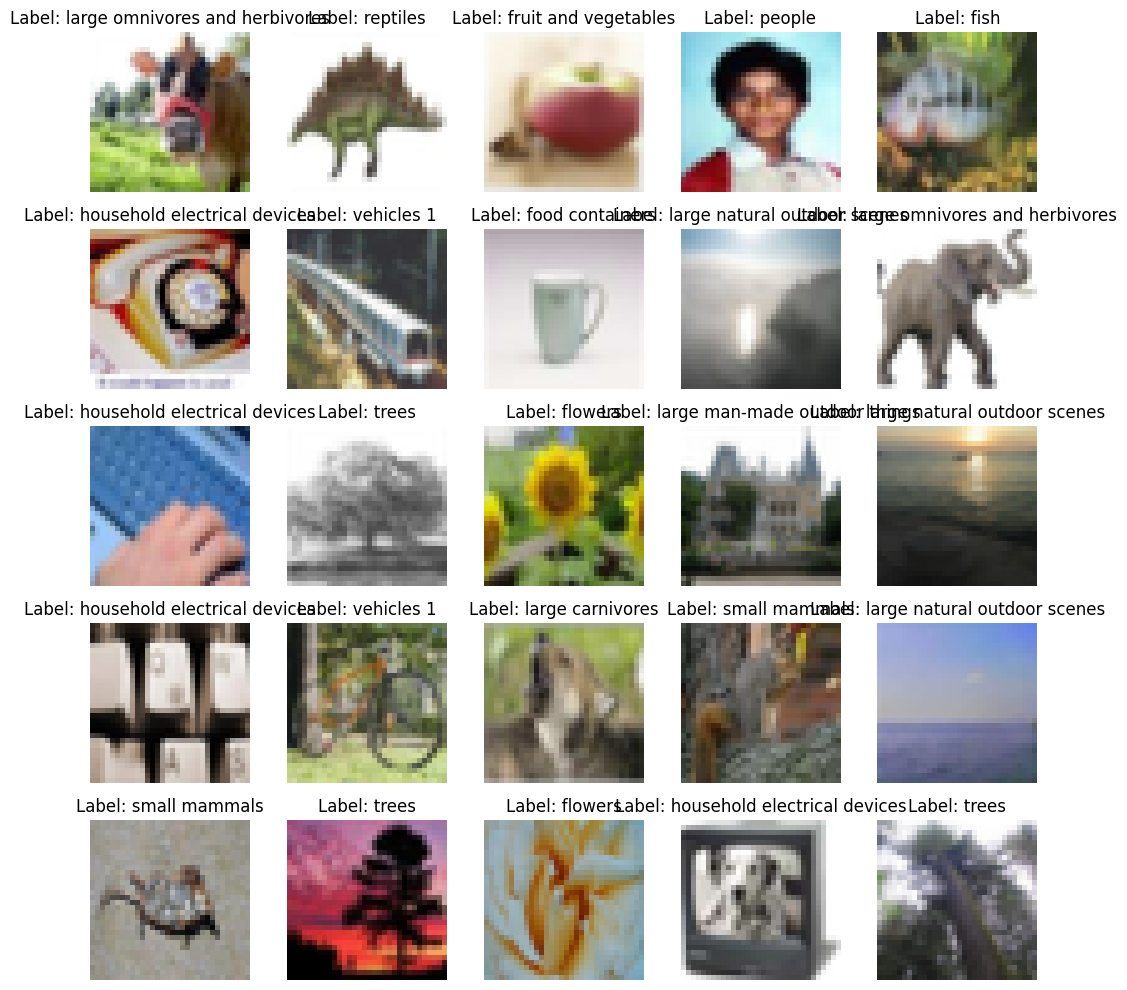

In [62]:
fig, axes = plt.subplots(5, 5, figsize=(10,10))
axes = axes.flatten() 
class_names = ["aquatic mammals","fish","flowers","food containers","fruit and vegetables","household electrical devices",
"household furniture","insects","large carnivores","large man-made outdoor things","large natural outdoor scenes","large omnivores and herbivores","medium-sized mammals","non-insect invertebrates","people","reptiles","small mammals","trees","vehicles 1","vehicles 2"]


for i in range(25):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title('Label: {}'.format(class_names[y_train[i][0]]))
plt.tight_layout()
plt.show()



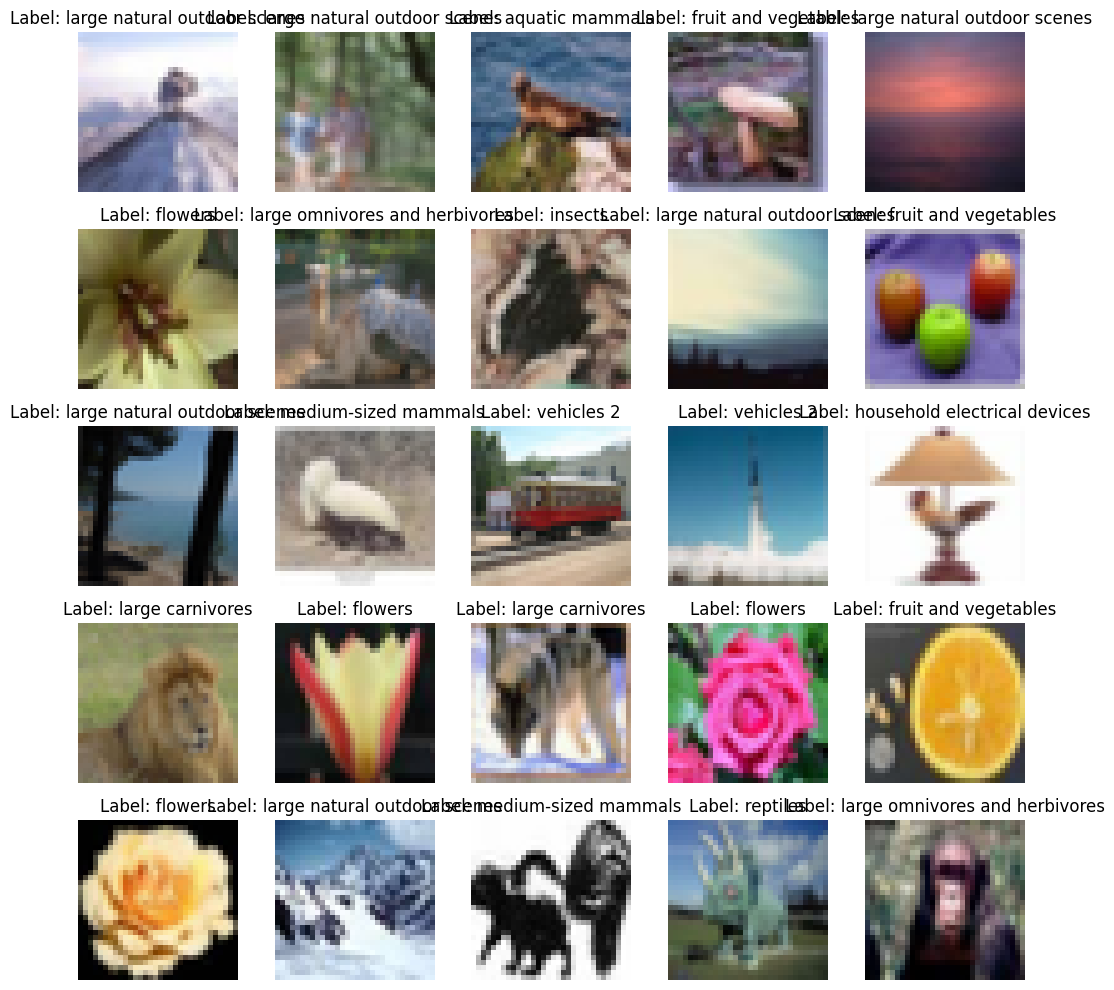

In [63]:
fig, axes = plt.subplots(5, 5, figsize=(10,10))
axes = axes.flatten() 
class_names = ["aquatic mammals","fish","flowers","food containers","fruit and vegetables","household electrical devices",
"household furniture","insects","large carnivores","large man-made outdoor things","large natural outdoor scenes","large omnivores and herbivores","medium-sized mammals","non-insect invertebrates","people","reptiles","small mammals","trees","vehicles 1","vehicles 2"]


for i in range(25):
    axes[i].imshow(x_test[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title('Label: {}'.format(class_names[y_test[i][0]]))
plt.tight_layout()
plt.show()



Import layers and models from tensorflow.keras and build a Sequential Model with Convulation layers at the base and Fully Connected Layers at the top.

We used the same model in the Example Notebook for MNIST and achieved only 41% accuracy on the test data.

We then used the following architecture to achieve 45% accuracy on the test data:

1. Conv Layer : 32 filters each of 3x3.
2. Conv Layer : 64 filters each of 3x3.
3. Max pool layer of 2x2 kernel size.
4. Conv Layer : 64 filters each of 2x2.
5. Conv Layer : 64 filters each of 2x2.
6. Max pool layer of 2x2 kernel size.
7. Flatten.
8. Dense of 80 neurons.
9. Dense of 50 neurons.
10. Dense of 20 neurons.

To train this, it required 40 minutes.

You should come up with your own architecture.

In [75]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense,BatchNormalization,Conv2D,MaxPooling2D,Flatten,Dropout,AveragePooling2D,Activation,GlobalAveragePooling2D


In [65]:
model=Sequential([ 
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3),padding='same'), 
    BatchNormalization(),
    Conv2D(64,(3,3),activation='relu',padding='same'),  
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    

    Conv2D(128,(3,3),activation='relu',input_shape=(32,32,3),padding='same'), 
    BatchNormalization(), 
    MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    Conv2D(256,(3,3),activation='relu',padding='same'),  
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    

    Conv2D(512,(3,3),activation='relu',input_shape=(32,32,3),padding='same'), 
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
    
    

    Flatten(),
    Dense(512,activation='relu'), 
    BatchNormalization(),
    Dense(128,activation='relu'), 
    BatchNormalization(), 
    Dense(20,activation='softmax'), 

])

/Users/shrutisekhar/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,692,436 (10.27 MB)

 Trainable params: 2,689,172 (10.26 MB)

 Non-trainable params: 3,264 (12.75 KB)

In [70]:

history = model.fit(x_train, y_train, epochs=5,validation_data=(x_test, y_test))


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 87ms/step - accuracy: 0.6864 - loss: 0.9788 - val_accuracy: 0.6090 - val_loss: 1.2720
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 85ms/step - accuracy: 0.7709 - loss: 0.7182 - val_accuracy: 0.5849 - val_loss: 1.3909
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 86ms/step - accuracy: 0.8379 - loss: 0.5037 - val_accuracy: 0.6153 - val_loss: 1.3886
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 85ms/step - accuracy: 0.8856 - loss: 0.3533 - val_accuracy: 0.6145 - val_loss: 1.5289
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 86ms/step - accuracy: 0.9175 - loss: 0.2561 - val_accuracy: 0.6231 - val_loss: 1.5623


Plot the training accuracy vs number of epochs graph. Print the test accuracy.

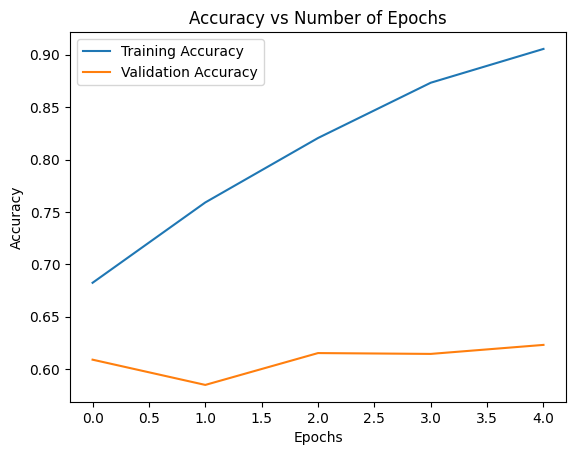

In [72]:
plt.plot(history.history['accuracy'], label='Training Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Epochs')
plt.legend()
plt.show()

In [73]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6237 - loss: 1.5634
Test accuracy: 0.6230999827384949


Check this website : https://paperswithcode.com/sota/image-classification-on-cifar-100 . It contains information about the best performing models. The top models are of transformers. We can check the ResNet-18 model. It consists of 18 layers. The architecture could be in the internet. Use ChatGPT if necessary. Training it for 10 epochs will take approximately 1 hour.

The layers are :

1. Conv layer : 64 kernels, 7x7 . strides = (2,2). activation =none.
2. Batch Normalization.
3. Relu Activation.
4. MaxPooling 3x3 . stride =2x2.
5. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none.
6. Batch Normalization.
7. Relu Activation.
8. Same as 5 but 128 kernels.
9. Batch Normalization.
10. Relu Activation.
11. Same as 5 but 256 kernels.
12. Batch Normalization.
13. Relu Activation.
14. Same as 5 but 512 kernels.
15. Batch Normalization.
16. Relu Activation.
17. Global Average Pooling.
18. Dense layer of 20 neurons.





In [81]:
resnet_model=Sequential([
    Conv2D(64,(7,7),input_shape=(32,32,3)), 
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(3,3),strides=(2,2)), 
    Conv2D(64,(3,3)), 
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128,(3,3)), 
    BatchNormalization(),
    Activation('relu'), 
    Conv2D(256,(3,3)), 
    BatchNormalization(),
    Activation('relu'), 
    Conv2D(512,(3,3)), 
    BatchNormalization(),
    Activation('relu'),
    GlobalAveragePooling2D(),
    Dense(20,activation='softmax'),
])

/Users/shrutisekhar/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
resnet_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [87]:
resnet_history=resnet_model.fit(x_train, y_train, epochs=20,validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.6640 - loss: 1.0505 - val_accuracy: 0.5464 - val_loss: 1.5384
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.6947 - loss: 0.9490 - val_accuracy: 0.4501 - val_loss: 1.9691
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.7202 - loss: 0.8653 - val_accuracy: 0.5297 - val_loss: 1.6753
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.7469 - loss: 0.7896 - val_accuracy: 0.5523 - val_loss: 1.6076
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.7674 - loss: 0.7163 - val_accuracy: 0.5306 - val_loss: 1.6546
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.7920 - loss: 0.6420 - val_accuracy: 0.5672 - val_loss: 1.5924
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.8112 - loss: 0.5820 - val_accuracy: 0.5543 - val_loss: 1.6680
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 60ms/step - accuracy: 0.8319 -

In [88]:
test_loss, test_acc = resnet_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5402 - loss: 2.3967
Test accuracy: 0.5367000102996826


# Question 2: Rising Fuel Prices
In a regression problem, the aim is to predict the output of a continuous value, like a price or a probability.

In this question, we will be using the classic Auto MPG dataset and build a model to predict the fuel efficiency of the late-1970s and early 1980s automobiles. To do this, we will provide the models with a description of many automobiles from that time period. This description includes attributes like cylinders, displacement, horsepower, and weight.

In [89]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Load the data.

In [98]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN


Get an overview of the data.

In [99]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      0 non-null      float64
dtypes: float64(6), int64(3)
memory usage: 28.1 KB


Drop the null values and redundant columns. Or you may do imputation of null values, if you are familiar with that.

Search for dropping rows with null values in a Pandas dataframe.

In [100]:
from sklearn.impute import SimpleImputer   
dataset.drop(columns=['Car Name'],inplace=True)
imputer=SimpleImputer(missing_values=np.nan,strategy='mean') 
numerical_columns = dataset.select_dtypes(include=[np.number]).columns
dataset[numerical_columns] = imputer.fit_transform(dataset[numerical_columns])


In [101]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


##Handling Non-Numeric Data
The origin column contains "Label Encoded Values". More about it [here](https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/).

We want to convert it into a [One-Hot-Encoded](https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python//) value.

In [102]:
# Convert categorical 'Origin' column to one-hot encoded features : pd.get_dummies ...
dataset=pd.get_dummies(dataset,columns=['Origin']) 
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_1.0,Origin_2.0,Origin_3.0
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,True,False,False
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,True,False,False
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,True,False,False
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,True,False,False
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,True,False,False
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,False,True,False
395,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,True,False,False
396,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,True,False,False


In [123]:
# Separate the target variable from the features in the dataset.
x=dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin_1.0','Origin_2.0','Origin_3.0']]
y=dataset[['MPG']]

In [124]:
# Split the data into training and testing sets. Use sklearn.model_selection.train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(318, 9) (318, 1)
(80, 9) (80, 1)


#Scaling the Data
It is evident that the features vary a lot by a quick statistical survey. To ensure that our model generalizes over a large variety of vehicles, we need to Normalize the data using the *scaler.fit_transform*.

In [126]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
columns=['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']
x_train = scaler.fit_transform(x_train[columns])
x_test = scaler.transform(x_test[columns])



In [127]:
print(y_train)

      MPG
3    16.0
18   27.0
376  37.0
248  36.1
177  23.0
..    ...
71   19.0
106  12.0
270  21.1
348  37.7
102  26.0

[318 rows x 1 columns]


# Building the Model

Build a Fully Connected Neural Network with 3-4 Dense layers. You may decide the number of neuron in each layers.

Fit the model on the train data and evaluate the predictions on test data.

Use Adam optimizer and MeanSquaredError cost function. The lower the error, the better the model. Try to get MSE < 6 on the test data.

In [146]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(6,)),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')  

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True,verbose=1)
history = model.fit(x_train , y_train, epochs=100, verbose=1,callbacks=early_stopping)


Epoch 1/100


/Users/shrutisekhar/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 586.4471
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 562.7051
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 506.8546
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 410.4766
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 277.2657
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 148.2170
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 61.2478
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 42.9971
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 33.9327
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 33.8984
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 30.3104
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 24.8652
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 22.2225
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 21.7882
Epoch 15/100


/Users/shrutisekhar/Library/Python/3.9/lib/python/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 22.4476
Epoch 16/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 17.9137
Epoch 17/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 15.3835
Epoch 18/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 18.4468
Epoch 19/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 13.9968
Epoch 20/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 15.5741
Epoch 21/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 13.7137
Epoch 22/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 14.1013
Epoch 23/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 12.5532
Epoch 24/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 13.1705
Epoch 25/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 13.9202
Epoch 26/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 13.4706
Epoch 27/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 11.7337
Epoch 28/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 11.7886
Epoch 29/100
10/10 ━━━━━━━━━━━━━━

In [147]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on test data:", mse)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x35a1dfee0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Mean Squared Error (MSE) on test data: 5.4949347078302075


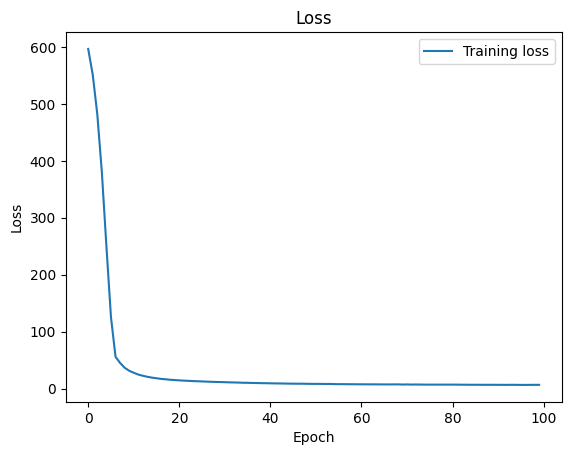

In [148]:
#Plot the Loss from the history

import matplotlib.pyplot as plt
plt.plot(history.history['loss']) 
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss'])
plt.show()


In [149]:
# Evaluate the model on the test set 
mse=model.evaluate(x_test,y_test) 
print(f'test mse:{mse}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 5.7827
test mse:5.494934558868408
